<a href="https://colab.research.google.com/github/Silfa2/nlpcc-ui-2025/blob/main/class2_regex_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Class Assignment 2: Regex Explorations in Text Data - Silfa Wulandari - 2206090192

**Dataset:** 'covid-sentiment.csv` (Tweet COVID-19 Indonesia Mei-Juli 2020)

Saya memilih dataset **COVID-19 Indonesian Tweets (May–July 2020)** karena merepresentasikan dinamika opini publik Indonesia pada masa krisis kesehatan, di mana sentimen, ketidakpercayaan, dan keresahan terhadap kebijakan pemerintah banyak diungkapkan melalui media sosial. Dataset ini kaya akan elemen linguistik khas seperti hashtag, mention, URL, serta tanda baca berlebih yang mencerminkan emosi, sarkasme, dan keluhan masyarakat. Kehadiran kata kunci seperti “vaksin,” “covid,” dan “lockdown” juga memperkuat relevansi tematik, menjadikannya sumber ideal untuk analisis sentimen, framing isu, dan studi perilaku digital masyarakat dalam konteks kebijakan publik dan pandemi.

In [3]:
# Impor Library
import pandas as pd
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from urllib.parse import urlparse
from google.colab import drive

print("Library siap.")
# Hubungkan Google Drive
drive.mount('/content/drive')
print("\nGoogle Drive siap.")
# --- GANTI PATH FILE & NAMA KOLOM JIKA PERLU ---
file_path = '/content/drive/MyDrive/NLP-CC/covid-sentiment.csv' # <--- GANTI PATH INI!
nama_kolom_teks = 'tweet' # <--- GANTI JIKA NAMA KOLOM TEKS BEDA!
# --- (Akhir bagian ganti) ---

try:
    df = pd.read_csv(file_path)
    print(f"Dataset berhasil dimuat dari: {file_path}")

    # Pre-processing kolom teks
    if nama_kolom_teks in df.columns:
        df[nama_kolom_teks] = df[nama_kolom_teks].astype(str).fillna('')
        print(f"Kolom teks '{nama_kolom_teks}' siap digunakan.")
        print("\nContoh Data:")
        print(df[[nama_kolom_teks]].head())
    else:
        print(f"\nERROR: Kolom '{nama_kolom_teks}' tidak ditemukan! Periksa nama kolom.")
        df = None

except FileNotFoundError:
    print(f"\nERROR: File tidak ditemukan di {file_path}. Periksa path!")
    df = None
except Exception as e:
    print(f"\nERROR saat membaca file: {e}")
    df = None

if df is None:
    print("\n*** PROSES BERHENTI KARENA DATA GAGAL DIMUAT ***")

Library siap.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Google Drive siap.
Dataset berhasil dimuat dari: /content/drive/MyDrive/NLP-CC/covid-sentiment.csv
Kolom teks 'tweet' siap digunakan.

Contoh Data:
                                               tweet
0   https://bit.ly/2L6CcbB  | Seharusnya saat ini...
1  Klo kata gw Pemerintah tuh lagi menerapkan Her...
2  Saat ini yang bisa saya lakukan hanya menyiapk...
3  Satu Warga Positif Corona, Bupati: Kondisi ini...
4  emosi bgt, lg kondisi begini gue disuruh liput...


## Tujuan 1: Menemukan Hashtags (#tag)

**Alasan:** Mengidentifikasi topik atau kampanye utama terkait COVID-19.

In [4]:
# Pola 1: Dasar (# diikuti alphanumeric/underscore)
pola_1_hashtag = r"#\w+"
hasil_pola_1_hashtag = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_1_hashtag, teks)
        if cocok: hasil_pola_1_hashtag.extend(cocok)

print(f"--- Pola 1 ({pola_1_hashtag}) ---")
print(f"Jumlah temuan: {len(hasil_pola_1_hashtag)}")
print(f"Contoh: {hasil_pola_1_hashtag[:10]}")

--- Pola 1 (#\w+) ---
Jumlah temuan: 37519
Contoh: ['#rakyatdotnews', '#referensiterkini', '#rakyatnews', '#dirumahaja', '#ProsesnewsID', '#PSBB', '#Gorontalo', '#KPULawanCovid19', '#SkandalAmiesPemprovDKI', '#SahurSegerr15']


**Analisa Pola 1:**
*   Mencari `#` diikuti `\w+`.
*   **Keterbatasan:** Bisa menangkap tag yang menempel pada kata lain.

In [5]:
# Pola 2: Menambah word boundary (\b) dan ekstrak isi tag
pola_2_hashtag = r"#(\w+)\b"
hasil_pola_2_hashtag = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_2_hashtag, teks)
        if cocok: hasil_pola_2_hashtag.extend(cocok)

print(f"--- Pola 2 ({pola_2_hashtag}) ---")
print(f"Jumlah temuan (isi tag): {len(hasil_pola_2_hashtag)}")
print(f"Contoh: {hasil_pola_2_hashtag[:10]}")

--- Pola 2 (#(\w+)\b) ---
Jumlah temuan (isi tag): 37519
Contoh: ['rakyatdotnews', 'referensiterkini', 'rakyatnews', 'dirumahaja', 'ProsesnewsID', 'PSBB', 'Gorontalo', 'KPULawanCovid19', 'SkandalAmiesPemprovDKI', 'SahurSegerr15']


**Analisa Pola 2:**
*   Menambah `\b`; pakai grup `()` untuk ekstrak username.
*   **Peningkatan:** Lebih akurat.
*   **Keterbatasan:** Belum validasi panjang username.

In [6]:
# Pola 3: Format username Twitter (1-15 char, alphanumeric/underscore)
pola_3_mention = r"@([a-zA-Z0-9_]{1,15})\b"
hasil_pola_3_mention = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_3_mention, teks)
        if cocok: hasil_pola_3_mention.extend(cocok)

mentions_ditemukan = [mention.lower() for mention in hasil_pola_3_mention]

print(f"--- Pola 3 ({pola_3_mention}) ---")
print(f"Jumlah temuan (final): {len(mentions_ditemukan)}")
print(f"Contoh: {mentions_ditemukan[:10]}")

--- Pola 3 (@([a-zA-Z0-9_]{1,15})\b) ---
Jumlah temuan (final): 8075
Contoh: ['gooddoctorid', 'nanangmas0384', 'null', 'null', 'sonorafm92', 'radioelshinta', 'pemkotbekasi', 'kominfobekasi', 'radiodakta', 'radarbekasi']


**Analisa Pola 3:**
*   Pakai `[a-zA-Z0-9_]` dan `{1,15}`.
*   **Peningkatan:** Sangat akurat sesuai format Twitter.
*   **Keterbatasan:** Tidak validasi eksistensi akun.

## Tujuan 3: Menemukan Ekspresi Emosi/Keluhan Kuat (Tanda Baca Berlebih)

**Alasan:** Mendeteksi indikator sentimen kasar.

In [8]:
# Pola 1: Tanda seru berlebih (minimal 2)
pola_1_emosi = r"!{2,}"
hasil_pola_1_emosi = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_1_emosi, teks)
        if cocok: hasil_pola_1_emosi.extend(cocok)

print(f"--- Pola 1 ({pola_1_emosi}) ---")
print(f"Jumlah temuan: {len(hasil_pola_1_emosi)}")
print(f"Contoh: {hasil_pola_1_emosi[:10]}")
# Pola 2: Tanda tanya berlebih (minimal 2)
pola_2_emosi = r"\?{2,}" # Escape '?'
hasil_pola_2_emosi = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_2_emosi, teks)
        if cocok: hasil_pola_2_emosi.extend(cocok)

print(f"--- Pola 2 ({pola_2_emosi}) ---")
print(f"Jumlah temuan: {len(hasil_pola_2_emosi)}")
print(f"Contoh: {hasil_pola_2_emosi[:10]}")

--- Pola 1 (!{2,}) ---
Jumlah temuan: 542
Contoh: ['!!', '!!', '!!', '!!!', '!!', '!!', '!!', '!!', '!!!', '!!']
--- Pola 2 (\?{2,}) ---
Jumlah temuan: 569
Contoh: ['??', '???', '???', '??', '???', '??', '??', '??', '??', '??']


**Analisa Pola 1:**
*   Mencari `!` minimal 2 kali (`{2,}`).
*   **Keterbatasan:** Hanya tanda seru.

**Analisa Pola 2:**
*   Mencari `?` minimal 2 kali (`\?{2,}`).
*   **Peningkatan:** Menangkap indikator pertanyaan kuat.
*   **Keterbatasan:** Hanya tanda tanya.

In [9]:
# Pola 3: Gabungan tanda seru ATAU tanya berlebih
pola_3_emosi = r"(!{2,}|\?{2,})"
hasil_pola_3_emosi = []
tweet_dengan_emosi = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        if re.search(pola_3_emosi, teks):
            cocok = re.findall(pola_3_emosi, teks)
            hasil_pola_3_emosi.extend(cocok)
            tweet_dengan_emosi.append(teks)

emotion_markers_ditemukan = hasil_pola_3_emosi

print(f"--- Pola 3 ({pola_3_emosi}) ---")
print(f"Jumlah temuan marker: {len(emotion_markers_ditemukan)}")
print(f"Contoh marker: {emotion_markers_ditemukan[:10]}")
print(f"Jumlah tweet dengan marker: {len(tweet_dengan_emosi)}")
print(f"Contoh tweet:")
for t in tweet_dengan_emosi[:3]: print(f"- {t[:150]}...")

--- Pola 3 ((!{2,}|\?{2,})) ---
Jumlah temuan marker: 1111
Contoh marker: ['??', '!!', '???', '!!', '???', '!!', '!!!', '!!', '??', '!!']
Jumlah tweet dengan marker: 955
Contoh tweet:
- Lah pie iki?? 
Menteri Keuangan Sri Mulyani mengatakan bahwa Pemprov DKI Jakarta meminta pemerintah pusat menanggung semua bansos untuk diberikan kepa...
- Soalnya Rakyat kecil bukan TKA China yg selalu di bela pemerintah Pa..!!  

Modus Baru Pemudik Nekat saat Pandemi Covid-19, Ngumpet dalam Truk Molen :...
- Tarik ulur kebijakan moda transportasi, saya nilai seakan-akan pemerintah @BudiKaryaS  tidak serius atau tidak konsisten untuk menekan angka penyebara...


**Analisa Pola 3:**
*   Menggunakan `|` (ATAU) untuk `!{2,}` dan `\?{2,}`.
*   **Peningkatan:** Menangkap kedua jenis marker.
*   **Keterbatasan:** Indikator kasar, perlu konteks.

## Tujuan 4: Mengekstrak URL

**Alasan:** Menganalisis sumber informasi yang dibagikan.

In [10]:
# Pola 1: Dasar (http/https diikuti non-spasi)
pola_1_url = r"https?://\S+"
hasil_pola_1_url = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_1_url, teks)
        if cocok: hasil_pola_1_url.extend(cocok)

print(f"--- Pola 1 ({pola_1_url}) ---")
print(f"Jumlah temuan: {len(hasil_pola_1_url)}")
print(f"Contoh: {hasil_pola_1_url[:5]}")

--- Pola 1 (https?://\S+) ---
Jumlah temuan: 21364
Contoh: ['https://bit.ly/2L6CcbB', 'http://dlvr.it/RWBnbD', 'https://prosesnews.id/psbb-untuk-kita-semua/', 'https://m.cnnindonesia.com/nasional/20200507051113-20-500919/tiga-menteri-jokowi-soroti-kejanggalan-bansos-anies-di-dki', 'https://www.gelora.co/2020/05/jokowi-kita-beruntung-sejak-awal-pilih.html']


**Analisa Pola 1:**
*   Mencari `http`, `s?`, `://`, diikuti `\S+`.
*   **Keterbatasan:** Bisa menangkap tanda baca akhir.

In [11]:
# Pola 2: Mencoba menghindari tanda baca akhir (heuristik)
pola_2_url = r"https?://[^\s/$.?#].[^\s]*[^\s.,;:!?()]"
hasil_pola_2_url = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_2_url, teks)
        if cocok: hasil_pola_2_url.extend(cocok)

print(f"--- Pola 2 ({pola_2_url}) ---")
print(f"Jumlah temuan: {len(hasil_pola_2_url)}")
print(f"Contoh: {hasil_pola_2_url[:5]}")

--- Pola 2 (https?://[^\s/$.?#].[^\s]*[^\s.,;:!?()]) ---
Jumlah temuan: 21364
Contoh: ['https://bit.ly/2L6CcbB', 'http://dlvr.it/RWBnbD', 'https://prosesnews.id/psbb-untuk-kita-semua/', 'https://m.cnnindonesia.com/nasional/20200507051113-20-500919/tiga-menteri-jokowi-soroti-kejanggalan-bansos-anies-di-dki', 'https://www.gelora.co/2020/05/jokowi-kita-beruntung-sejak-awal-pilih.html']


**Analisa Pola 2:**
*   Lebih kompleks, mencoba memastikan karakter terakhir bukan tanda baca umum.
*   **Peningkatan:** Lebih mungkin menghasilkan URL bersih.
*   **Keterbatasan:** Masih heuristik.

In [12]:
# Pola 3: Pola URL standar yang lebih robust
pola_3_url = r'(https?://(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&//=]*))'
hasil_pola_3_url = []
if df is not None:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_3_url, teks)
        if cocok: hasil_pola_3_url.extend(cocok)

urls_ditemukan = hasil_pola_3_url

print(f"--- Pola 3 ({pola_3_url}) ---")
print(f"Jumlah temuan (final): {len(urls_ditemukan)}")
print(f"Contoh: {urls_ditemukan[:5]}")

--- Pola 3 ((https?://(?:www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b(?:[-a-zA-Z0-9()@:%_\+.~#?&//=]*))) ---
Jumlah temuan (final): 21355
Contoh: ['https://bit.ly/2L6CcbB', 'http://dlvr.it/RWBnbD', 'https://prosesnews.id/psbb-untuk-kita-semua/', 'https://m.cnnindonesia.com/nasional/20200507051113-20-500919/tiga-menteri-jokowi-soroti-kejanggalan-bansos-anies-di-dki', 'https://www.gelora.co/2020/05/jokowi-kita-beruntung-sejak-awal-pilih.html']


**Analisa Pola 3:**
*   Pola Regex kompleks standar untuk URL.
*   **Peningkatan:** Jauh lebih akurat menangkap format URL umum.
*   **Keterbatasan:** Mungkin tidak menangkap format URL non-standar.

In [13]:
# Visualisasi Frekuensi Kata Teratas
# Pastikan variabel top_words_df sudah ada dan tidak kosong dari sel sebelumnya
if 'top_words_df' in locals() and top_words_df is not None and not top_words_df.empty:
    print("\nMembuat plot frekuensi kata teratas...")

    # Atur ukuran plot
    plt.figure(figsize=(12, 8))

    # Buat bar chart horizontal (barh)
    # Sumbu Y adalah Kata, Sumbu X adalah Frekuensi
    plt.barh(top_words_df['Kata'], top_words_df['Frekuensi'], color='lightcoral')

    # Balik urutan sumbu Y agar kata paling sering muncul ada di paling atas
    plt.gca().invert_yaxis()

    # Beri label pada sumbu
    plt.xlabel('Frekuensi Kemunculan')
    plt.ylabel('Kata')

    # Beri judul plot
    plt.title('Top 20 Kata yang Paling Sering Muncul (Setelah Cleaning & Stopword Removal)')

    # Tambahkan teks nilai frekuensi di sebelah kanan setiap bar
    for index, value in enumerate(top_words_df['Frekuensi']):
        plt.text(value, index, f' {value}', va='center') # ' {value}' -> teksnya, value -> posisi x, index -> posisi y

    # Rapikan layout agar label tidak terpotong
    plt.tight_layout()

    # Tampilkan plot
    plt.show()
else:
    # Pesan jika tidak ada data untuk diplot
    print("\nTidak ada data kata teratas yang valid untuk dibuat plot.")


Tidak ada data kata teratas yang valid untuk dibuat plot.


## Tujuan 5: Menemukan Kata Kunci Kebijakan/Respons Pemerintah Terkait Pandemi

**Mengapa ini menarik?** Selama pandemi (seperti pada dataset Tweet COVID), banyak kebijakan dan respons pemerintah yang didiskusikan publik. Mengidentifikasi kata kunci seperti PSBB, WFH, lockdown, atau bantuan sosial (bansos) dapat membantu memahami fokus pembicaraan masyarakat terkait tindakan pemerintah pada periode tersebut.

In [14]:
# Sel Kode 16: Regex Tujuan 5 - Pola 1 (Dasar)

# Pola 1: Kata kunci dasar, case-insensitive
pola_1_kebijakan = r"psbb|lockdown|wfh" # <--- CONTOH, SESUAIKAN DENGAN DATASETMU!

hasil_pola_1_kebijakan = []
# Pastikan df ada dan tidak kosong sebelum loop
if 'df' in locals() and not df.empty and nama_kolom_teks in df.columns:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_1_kebijakan, teks, re.IGNORECASE)
        if cocok:
            # Ambil semua kecocokan dalam satu tweet
            hasil_pola_1_kebijakan.extend(cocok)
else:
    print("DataFrame 'df' tidak tersedia atau kolom teks tidak ditemukan.")

# Konversi ke huruf kecil untuk konsistensi
hasil_pola_1_kebijakan_lower = [k.lower() for k in hasil_pola_1_kebijakan]

# Tampilkan hasil
print(f"--- Hasil Pola 1 ({pola_1_kebijakan}) ---")
print(f"Jumlah total temuan kata kunci: {len(hasil_pola_1_kebijakan_lower)}")
print(f"Contoh 10 temuan pertama: {hasil_pola_1_kebijakan_lower[:10]}")
# Tampilkan kata kunci unik yang ditemukan
if hasil_pola_1_kebijakan_lower:
    print(f"Kata kunci unik ditemukan: {sorted(list(set(hasil_pola_1_kebijakan_lower)))}")
else:
    print("Tidak ada kata kunci yang ditemukan.")

--- Hasil Pola 1 (psbb|lockdown|wfh) ---
Jumlah total temuan kata kunci: 2830
Contoh 10 temuan pertama: ['psbb', 'psbb', 'psbb', 'psbb', 'lockdown', 'psbb', 'psbb', 'lockdown', 'psbb', 'psbb']
Kata kunci unik ditemukan: ['lockdown', 'psbb', 'wfh']


**Analisa Pola 1:**
*   Pola `r"psbb|lockdown|wfh"` menggunakan alternatif (`|`) untuk mencari salah satu dari kata kunci tersebut.
*   `re.IGNORECASE` digunakan agar pencarian tidak membedakan huruf besar/kecil (misal: `PSBB`, `psbb`, `Psbb` semua cocok).
*   Hasil dikonversi ke huruf kecil (`.lower()`) untuk memudahkan analisis frekuensi nanti.

**Keterbatasan:**
*   Daftar kata kunci sangat terbatas.
*   Tidak menggunakan *word boundaries* (`\b`), sehingga bisa salah cocok jika kata kunci muncul sebagai bagian dari kata lain (misal: `workflow` akan cocok dengan `wfh`).

In [15]:
# Sel Kode 17: Regex Tujuan 5 - Pola 2 (Word Boundaries & Variasi)

# Pola 2: Tambah word boundaries (\b) dan beberapa variasi/sinonim
pola_2_kebijakan = r"\b(psbb|lockdown|wfh|restrictions|social distancing|work from home)\b" # <--- CONTOH, TAMBAHKAN VARIASI RELEVAN!

hasil_pola_2_kebijakan = []
if 'df' in locals() and not df.empty and nama_kolom_teks in df.columns:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_2_kebijakan, teks, re.IGNORECASE)
        if cocok:
            hasil_pola_2_kebijakan.extend(cocok)
else:
    print("DataFrame 'df' tidak tersedia atau kolom teks tidak ditemukan.")

hasil_pola_2_kebijakan_lower = [k.lower() for k in hasil_pola_2_kebijakan]

# Tampilkan hasil
print(f"--- Hasil Pola 2 ({pola_2_kebijakan}) ---")
print(f"Jumlah total temuan kata kunci: {len(hasil_pola_2_kebijakan_lower)}")
print(f"Contoh 10 temuan pertama: {hasil_pola_2_kebijakan_lower[:10]}")
if hasil_pola_2_kebijakan_lower:
    print(f"Kata kunci unik ditemukan: {sorted(list(set(hasil_pola_2_kebijakan_lower)))}")
else:
    print("Tidak ada kata kunci yang ditemukan.")

--- Hasil Pola 2 (\b(psbb|lockdown|wfh|restrictions|social distancing|work from home)\b) ---
Jumlah total temuan kata kunci: 2884
Contoh 10 temuan pertama: ['psbb', 'psbb', 'psbb', 'psbb', 'lockdown', 'psbb', 'psbb', 'lockdown', 'psbb', 'psbb']
Kata kunci unik ditemukan: ['lockdown', 'psbb', 'restrictions', 'social distancing', 'wfh', 'work from home']


**Analisa Pola 2:**
*   `\b`: Ditambahkan di awal dan akhir grup `(...)` untuk memastikan kecocokan hanya pada kata utuh, bukan bagian dari kata lain.
*   Alternatif diperluas: Menambahkan `restrictions`, `social distancing`, dan `work from home` sebagai variasi atau istilah terkait.

**Peningkatan:**
*   Lebih akurat karena menggunakan `\b`.
*   Cakupan istilah kebijakan sedikit lebih luas.

**Keterbatasan:**
*   Masih banyak istilah kebijakan atau bantuan lain yang mungkin terlewat (misal: terkait vaksinasi, bantuan sosial spesifik).

--- Hasil Pola 3 (\b(psbb|lockdown|wfh|restrictions|social distancing|work from home|social aid|assistance|bantuan|bansos|vaksin|vaccine)\b) ---
Jumlah total temuan kata kunci: 8395
Contoh 10 temuan pertama: ['bantuan', 'bantuan', 'psbb', 'psbb', 'bansos', 'bansos', 'bantuan', 'psbb', 'psbb', 'lockdown']
Kata kunci unik ditemukan: ['bansos', 'bantuan', 'lockdown', 'psbb', 'restrictions', 'social distancing', 'vaksin', 'wfh', 'work from home']
Jumlah teks/berita yang mengandung kata kunci: 5965

--- Analisis Frekuensi Kata Kunci Kebijakan/Bantuan (dari Pola 3) ---

Tabel Frekuensi Kata Kunci:
       Kata Kunci  Frekuensi
          bantuan       3615
             psbb       2142
           bansos       1147
           vaksin        749
         lockdown        462
social distancing        148
              wfh         90
   work from home         41
     restrictions          1


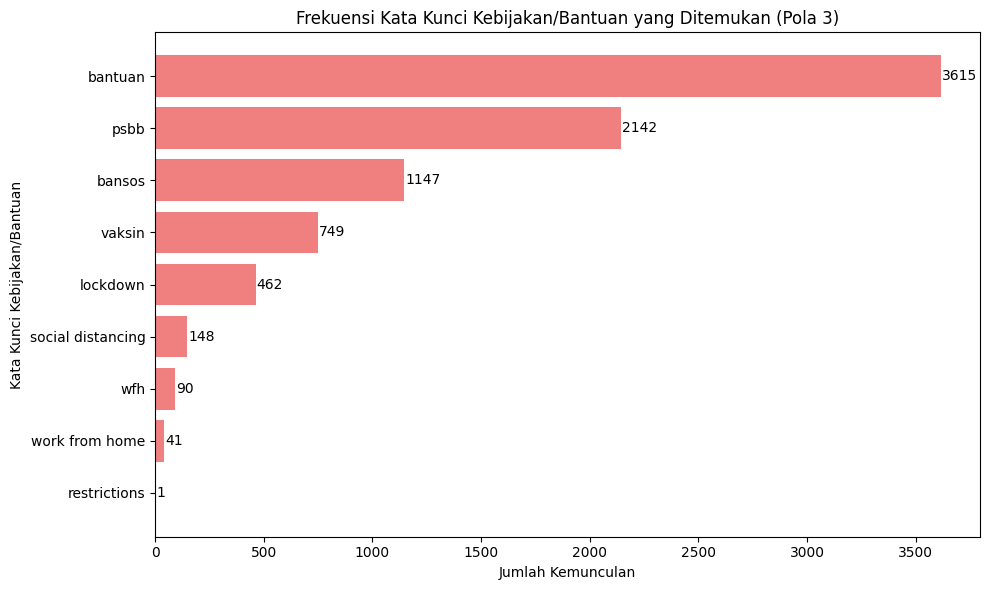

In [16]:
# Sel Kode 18: Regex Tujuan 5 - Pola 3 (Menambah Konteks Bantuan & Visualisasi)

# Pola 3: Menambah kata kunci terkait bantuan sosial
pola_3_kebijakan = r"\b(psbb|lockdown|wfh|restrictions|social distancing|work from home|social aid|assistance|bantuan|bansos|vaksin|vaccine)\b" # <--- CONTOH, LENGKAPI DAFTAR KATA KUNCI!

hasil_pola_3_kebijakan = []
# Simpan juga teks asli yang mengandung kata kunci (jika perlu analisis konteks nanti)
teks_dengan_kebijakan = []

if 'df' in locals() and not df.empty and nama_kolom_teks in df.columns:
    for teks in df[nama_kolom_teks]:
        # Gunakan re.finditer untuk mendapatkan objek match (lebih fleksibel jika perlu info posisi)
        # Tapi untuk sekadar list kata, re.findall sudah cukup
        cocok = re.findall(pola_3_kebijakan, teks, re.IGNORECASE)
        if cocok:
            # Tambahkan semua kata kunci yang cocok dari teks ini
            hasil_pola_3_kebijakan.extend(cocok)
            # Tandai bahwa teks ini mengandung kata kunci
            teks_dengan_kebijakan.append(teks) # Bisa diganti df index jika perlu
else:
    print("DataFrame 'df' tidak tersedia atau kolom teks tidak ditemukan.")

# Konversi ke huruf kecil
kebijakan_ditemukan = [k.lower() for k in hasil_pola_3_kebijakan]

# Tampilkan ringkasan hasil Regex
print(f"--- Hasil Pola 3 ({pola_3_kebijakan}) ---")
print(f"Jumlah total temuan kata kunci: {len(kebijakan_ditemukan)}")
print(f"Contoh 10 temuan pertama: {kebijakan_ditemukan[:10]}")
if kebijakan_ditemukan:
    print(f"Kata kunci unik ditemukan: {sorted(list(set(kebijakan_ditemukan)))}")
    print(f"Jumlah teks/berita yang mengandung kata kunci: {len(teks_dengan_kebijakan)}") # Jumlah dokumen yang relevan
else:
    print("Tidak ada kata kunci yang ditemukan.")


# --- TAMBAHAN: Analisis Frekuensi & Visualisasi Kata Kunci Kebijakan ---
if kebijakan_ditemukan:
    print("\n--- Analisis Frekuensi Kata Kunci Kebijakan/Bantuan (dari Pola 3) ---")

    # 1. Hitung Frekuensi menggunakan Counter
    keyword_counts = Counter(kebijakan_ditemukan)
    # Urutkan berdasarkan frekuensi (paling banyak dulu)
    # .most_common() mengembalikan list of tuples [('kata', jumlah), ...]
    sorted_keywords = keyword_counts.most_common()

    # 2. Buat Tabel Frekuensi (Pandas DataFrame) agar rapi
    # Cek apakah Pandas sudah diimpor sebagai pd
    if 'pd' in globals():
        df_keywords = pd.DataFrame(sorted_keywords, columns=['Kata Kunci', 'Frekuensi'])
        print("\nTabel Frekuensi Kata Kunci:")
        # .to_string() bagus untuk menampilkan semua baris di Colab
        print(df_keywords.to_string(index=False))
    else:
        print("\nPandas tidak diimpor sebagai 'pd', menampilkan list frekuensi:")
        print(sorted_keywords) # Tampilkan list tuple jika pandas tidak ada

    # 3. Buat Visualisasi (Bar Chart Horizontal)
    # Cek apakah matplotlib.pyplot sudah diimpor sebagai plt
    if 'plt' in globals():
        # Ambil data untuk plot dari sorted_keywords
        labels = [item[0] for item in sorted_keywords]
        values = [item[1] for item in sorted_keywords]

        plt.figure(figsize=(10, max(6, len(labels) * 0.4))) # Ukuran dinamis berdasarkan jumlah label
        bars = plt.barh(labels, values, color='lightcoral') # Horizontal bar chart
        plt.xlabel('Jumlah Kemunculan')
        plt.ylabel('Kata Kunci Kebijakan/Bantuan')
        plt.title('Frekuensi Kata Kunci Kebijakan/Bantuan yang Ditemukan (Pola 3)')
        plt.gca().invert_yaxis() # Tampilkan kata kunci teratas di paling atas

        # Tambahkan label angka di ujung bar agar mudah dibaca
        for bar in bars:
            plt.text(bar.get_width() + 5, # Posisi x sedikit di kanan bar
                     bar.get_y() + bar.get_height()/2, # Posisi y di tengah bar
                     f'{bar.get_width()}', # Teks label (angka frekuensi)
                     va='center', # Vertical alignment = center
                     ha='left') # Horizontal alignment = left

        plt.tight_layout() # Atur layout agar tidak terpotong
        plt.show() # Tampilkan plot
    else:
        print("\nMatplotlib.pyplot tidak diimpor sebagai 'plt', visualisasi dilewati.")

else:
    print("\nTidak ada kata kunci kebijakan yang ditemukan untuk dianalisis frekuensinya.")

# Simpan hasil akhir ini jika perlu untuk analisis hilir lain
kebijakan_ditemukan_final = kebijakan_ditemukan
# df_keywords_final = df_keywords # Jika menggunakan pandas

--- Hasil Pola 3 (\b(psbb|lockdown|wfh|restrictions|social distancing|work from home|social aid|assistance|bantuan|bansos|vaksin|vaccine)\b) ---
Jumlah total temuan kata kunci: 8395
Contoh 10 temuan pertama: ['bantuan', 'bantuan', 'psbb', 'psbb', 'bansos', 'bansos', 'bantuan', 'psbb', 'psbb', 'lockdown']
Kata kunci unik ditemukan: ['bansos', 'bantuan', 'lockdown', 'psbb', 'restrictions', 'social distancing', 'vaksin', 'wfh', 'work from home']
Jumlah teks/berita yang mengandung kata kunci: 5965

--- Analisis Frekuensi Kata Kunci Kebijakan/Bantuan (dari Pola 3) ---

Tabel Frekuensi Kata Kunci (dengan border):


Kata Kunci,Frekuensi
bantuan,3615
psbb,2142
bansos,1147
vaksin,749
lockdown,462
social distancing,148
wfh,90
work from home,41
restrictions,1


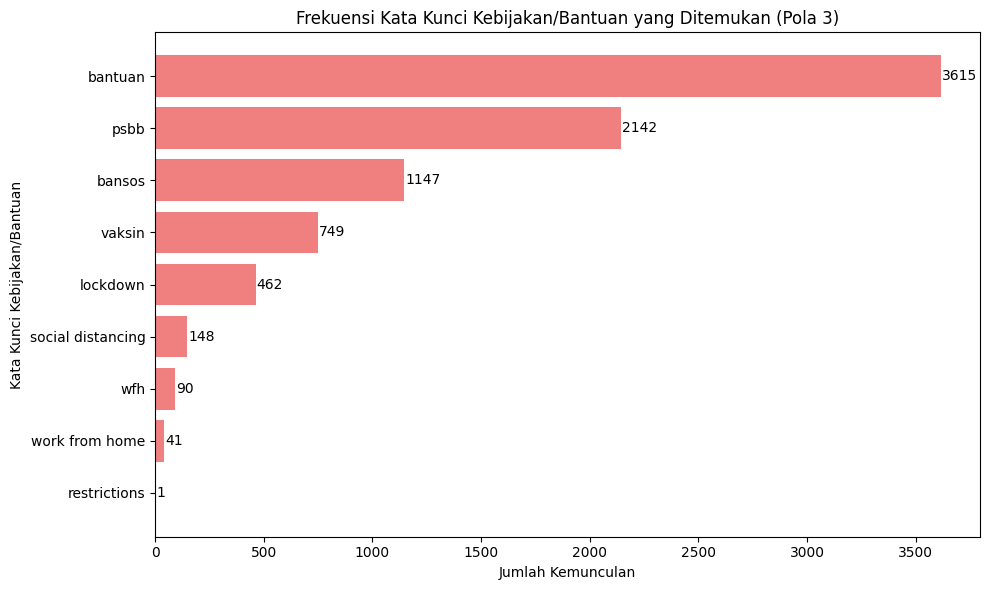

In [17]:
# Sel Kode 18: Regex Tujuan 5 - Pola 3 (Menambah Konteks Bantuan & Visualisasi)

# Pola 3: Menambah kata kunci terkait bantuan sosial
pola_3_kebijakan = r"\b(psbb|lockdown|wfh|restrictions|social distancing|work from home|social aid|assistance|bantuan|bansos|vaksin|vaccine)\b" # <--- CONTOH, LENGKAPI DAFTAR KATA KUNCI!

hasil_pola_3_kebijakan = []
teks_dengan_kebijakan = []

if 'df' in locals() and not df.empty and nama_kolom_teks in df.columns:
    for teks in df[nama_kolom_teks]:
        cocok = re.findall(pola_3_kebijakan, teks, re.IGNORECASE)
        if cocok:
            hasil_pola_3_kebijakan.extend(cocok)
            teks_dengan_kebijakan.append(teks)
else:
    print("DataFrame 'df' tidak tersedia atau kolom teks tidak ditemukan.")

kebijakan_ditemukan = [k.lower() for k in hasil_pola_3_kebijakan]

print(f"--- Hasil Pola 3 ({pola_3_kebijakan}) ---")
print(f"Jumlah total temuan kata kunci: {len(kebijakan_ditemukan)}")
print(f"Contoh 10 temuan pertama: {kebijakan_ditemukan[:10]}")
if kebijakan_ditemukan:
    print(f"Kata kunci unik ditemukan: {sorted(list(set(kebijakan_ditemukan)))}")
    print(f"Jumlah teks/berita yang mengandung kata kunci: {len(teks_dengan_kebijakan)}")
else:
    print("Tidak ada kata kunci yang ditemukan.")


# --- TAMBAHAN: Analisis Frekuensi & Visualisasi Kata Kunci Kebijakan ---
if kebijakan_ditemukan:
    print("\n--- Analisis Frekuensi Kata Kunci Kebijakan/Bantuan (dari Pola 3) ---")

    # 1. Hitung Frekuensi menggunakan Counter
    keyword_counts = Counter(kebijakan_ditemukan)
    sorted_keywords = keyword_counts.most_common()

    # 2. Buat Tabel Frekuensi (Pandas DataFrame) dengan Styling yang Lebih Baik
    if 'pd' in globals():
        df_keywords = pd.DataFrame(sorted_keywords, columns=['Kata Kunci', 'Frekuensi'])
        print("\nTabel Frekuensi Kata Kunci (dengan border):")

        # --- Styling untuk menambahkan border dan meningkatkan tampilan ---
        styles = [
            # Style untuk seluruh tabel: border luar dan collapse border
            {'selector': 'table',
             'props': [('border-collapse', 'collapse'), # Satukan border sel
                       ('border', '2px solid black'),   # Border tebal di luar tabel
                       ('width', 'auto')]},             # Lebar tabel otomatis
            # Style untuk sel header (th) dan sel data (td): border dalam, padding
            {'selector': 'th, td',
             'props': [('border', '1px solid #cccccc'), # Border abu-abu tipis di dalam sel
                       ('padding', '8px 12px'),      # Padding (atas/bawah, kiri/kanan)
                       ('text-align', 'left')]},     # Teks rata kiri
            # Style khusus untuk header (th): background, bold
            {'selector': 'th',
             'props': [('background-color', '#f2f2f2'), # Warna latar abu-abu muda
                       ('font-weight', 'bold')]}
        ]
        # Terapkan style dan gunakan display() untuk merender HTML di Colab
        # .hide(axis='index') menyembunyikan nomor index default Pandas (membutuhkan Pandas >= 1.4.0)
        # Jika Pandas lebih lama, gunakan .hide_index()
        display(df_keywords.style.set_table_styles(styles).hide(axis='index'))
        # -----------------------------------------------------------------

    else:
        # Fallback jika pandas tidak ada
        print("\nPandas tidak diimpor sebagai 'pd', menampilkan list frekuensi:")
        print(sorted_keywords)

    # 3. Buat Visualisasi (Bar Chart Horizontal) - Kode ini tetap sama
    if 'plt' in globals():
        labels = [item[0] for item in sorted_keywords]
        values = [item[1] for item in sorted_keywords]

        plt.figure(figsize=(10, max(6, len(labels) * 0.4)))
        bars = plt.barh(labels, values, color='lightcoral')
        plt.xlabel('Jumlah Kemunculan')
        plt.ylabel('Kata Kunci Kebijakan/Bantuan')
        plt.title('Frekuensi Kata Kunci Kebijakan/Bantuan yang Ditemukan (Pola 3)')
        plt.gca().invert_yaxis()

        for bar in bars:
            plt.text(bar.get_width() + 5,
                     bar.get_y() + bar.get_height()/2,
                     f'{bar.get_width()}',
                     va='center',
                     ha='left')

        plt.tight_layout()
        plt.show()
    else:
        print("\nMatplotlib.pyplot tidak diimpor sebagai 'plt', visualisasi dilewati.")

else:
    print("\nTidak ada kata kunci kebijakan yang ditemukan untuk dianalisis frekuensinya.")

# Simpan hasil akhir jika perlu
kebijakan_ditemukan_final = kebijakan_ditemukan
if 'df_keywords' in locals(): # Simpan jika df dibuat
    df_keywords_final = df_keywords

**Analisa Pola 3:**

Pola Regex `r"\b(psbb|...|bantuan|bansos|vaksin|vaccine)\b"` ini adalah versi **paling lengkap** untuk Tujuan 5.

*   **Pengembangan:** Memperluas Pola 2 dengan menambahkan **kata kunci penting** terkait **bantuan sosial** (seperti `bantuan`, `bansos`) dan **vaksinasi** (`vaksin`, `vaccine`).
*   **Fitur Utama:** Tetap menggunakan **word boundaries (`\b`)** untuk mencocokkan kata utuh dan **alternatif (`|`)** serta **pencarian case-insensitive** untuk menangkap variasi.
*   **Tujuan:** Menangkap **cakupan topik diskusi yang lebih luas** mengenai berbagai aspek respons pandemi (pembatasan, bantuan, vaksin) dalam teks.
*   **Keterbatasan Utama:** Daftar kata kunci mungkin **belum mencakup semua istilah** relevan, dan Regex **tidak memahami konteks/sentimen** penggunaan kata tersebut.

**RANGKUMAN**

Analisis ini untuk memahami bagaimana kebijakan dan respons pemerintah dipengaruhi oleh berbagai faktor selama pandemi, termasuk langkah-langkah pembatasan, kebijakan WFH, bantuan sosial, serta upaya vaksinasi. Melalui pendekatan regex yang semakin luas dan spesifik, kita dapat memperoleh gambaran yang lebih lengkap mengenai topik yang paling sering dibahas dalam konteks kebijakan pemerintah selama pandemi.
